# <font color=#225e71>DECISION TREE</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
data = pd.read_csv(r"C:\\Users\\Giorgis\\Desktop\\Projects\\ADTA coursework\\partI\\Census.csv")
data.head(1)

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade
0,7394816,E12000001,H,2,1,2,6,2,2,1,2,1,2,5,8,2,-9,NaN,4


In [3]:
data1 = data.drop(['Region', 'Residence Type', 'No of hours', 'Person ID'], axis=1)

df = data1
df

,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade
0,2,1,2,6,2,2,1,2,1,2,5,8,2,-9,4
1,3,1,2,1,1,2,1,2,1,1,-9,-9,-9,-9,-9
2,2,1,1,7,2,2,1,1,1,2,5,8,2,-9,2
3,1,1,2,6,4,2,1,3,1,2,5,9,5,-9,4
4,2,1,1,1,1,1,1,1,1,1,-9,-9,-9,-9,-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569735,-9,1,1,2,1,2,2,1,1,2,1,3,9,4,-9
569736,-9,1,1,3,1,2,2,2,2,1,1,1,5,4,-9
569737,-9,1,2,5,2,2,1,1,1,2,2,1,8,4,-9
569738,2,1,1,6,2,2,1,3,1,1,1,6,10,4,3


#### <font color=#225e71> Excluding the _-9_ value of the __Approximated Social Grade__ attribute </font>

In [4]:
df_exclude = df[(df['Approximated Social Grade'] == -9)]

df = df.drop(df_exclude.index)
df.head(0)

,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade


In [5]:
X = df.drop('Approximated Social Grade', axis=1)

In [6]:
y = df['Approximated Social Grade']


In [7]:
fn = []

for fn_i in df:
    fn.append(fn_i)

In [8]:
class_names = np.array(['AB', 'C1', 'C2', 'DE']) 

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

#### <font color=#225e71>Decision tree creation. Including the modified model parameters</font>


In [26]:
clf = tree.DecisionTreeClassifier(max_leaf_nodes=100, min_samples_leaf=30, max_depth=10)
clf.fit(X_train,y_train)

predict3 = clf.predict(X_train, check_input=True)


In [27]:
predict3

array([4, 4, 1, ..., 1, 3, 2], dtype=int64)

In [28]:
predict4 = clf.predict(X_test)
print(predict4)

[1 4 4 ... 3 3 4]


#### <font color=#225e71> Accuracy of the model that we created with modified model parameters.</font>


In [29]:
score2 = clf.score(X_test, y_test)
score2

0.7866289680758759

#### <font color=#225e71>Designing the Decision Tree.</font>


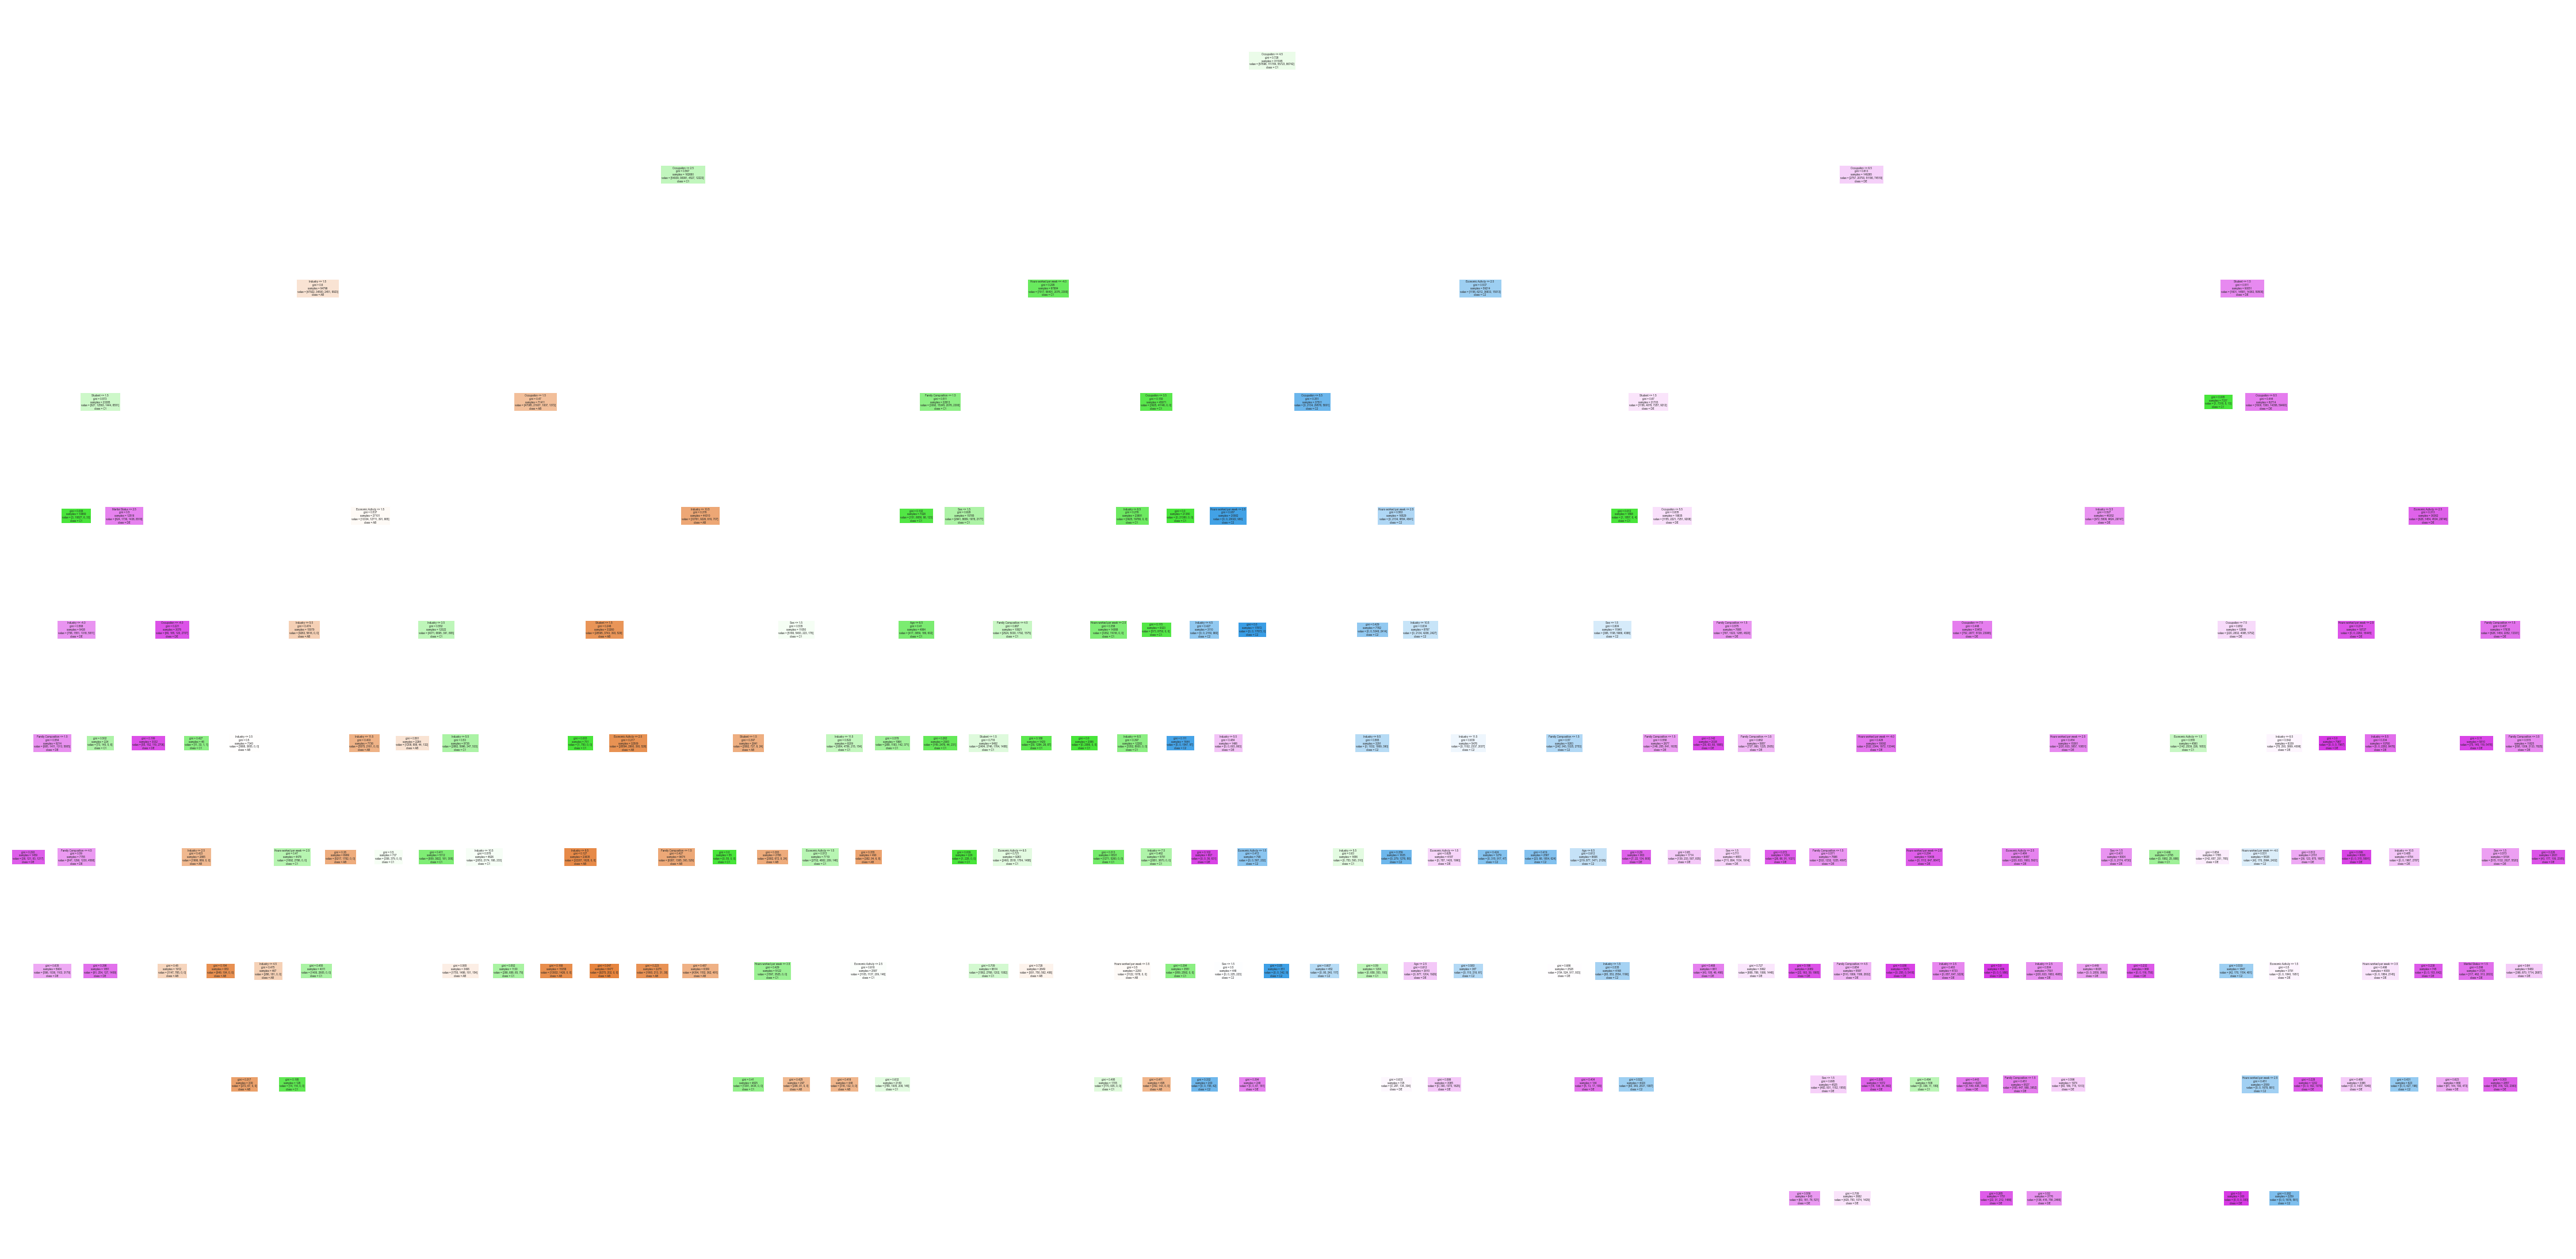

In [30]:
fig = plt.figure(figsize=(80,40))
_ = tree.plot_tree(clf,
                   feature_names=fn,
                   class_names= class_names,
                   filled=True)

In [31]:
predictions = clf.predict(X_test)

In [32]:
print('Confusion matrix:\n {}'.format(confusion_matrix(y_test, predictions)))
print('\n')
print('Classification report:\n {}'.format(classification_report(y_test, predictions)))
print('\n')
print('Model\'s accuracy:\n {}'.format(accuracy_score(y_test, predictions)))

Confusion matrix:
 [[18414  4735    65  1410]
 [ 4423 39027   593  3815]
 [  498  1091 15347  7277]
 [  456  1620  2543 32378]]


Classification report:
               precision    recall  f1-score   support

           1       0.77      0.75      0.76     24624
           2       0.84      0.82      0.83     47858
           3       0.83      0.63      0.72     24213
           4       0.72      0.88      0.79     36997

    accuracy                           0.79    133692
   macro avg       0.79      0.77      0.77    133692
weighted avg       0.79      0.79      0.79    133692



Model's accuracy:
 0.7866289680758759


In [33]:
features_imp = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=True)
features_imp

Population Base          0.000000
Country of Birth         0.000000
Health                   0.000000
Ethnic Group             0.000000
Religion                 0.000000
Marital Status           0.002163
Age                      0.002206
Sex                      0.013997
Family Composition       0.027809
Hours worked per week    0.030295
Economic Activity        0.048239
Industry                 0.139607
Student                  0.143377
Occupation               0.592307
dtype: float64

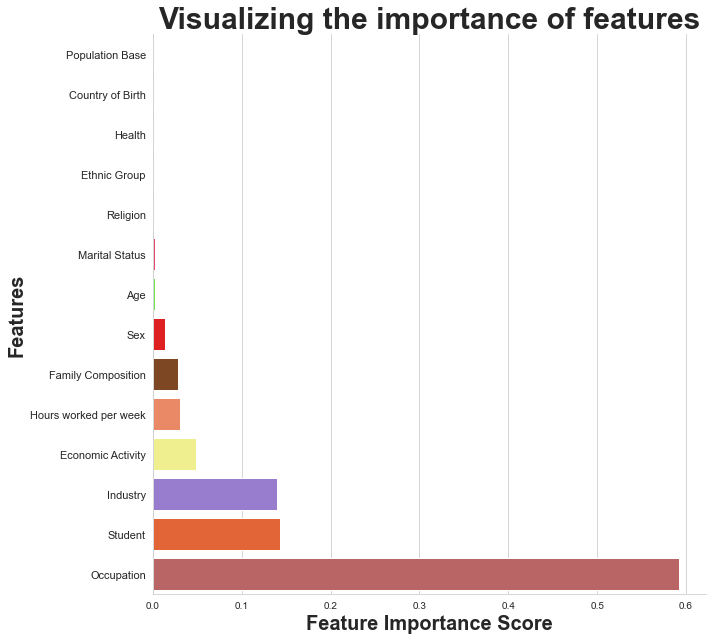

In [34]:
plt.figure(figsize=(10,9))
sns.set_style('whitegrid')

ax = sns.barplot(x=features_imp, y=features_imp.index, palette=["black", '#351a4f', "#ff692e", "#2e5cff", "#ffd12e", "#ff2e5c", "#5cff2e", "#ff0000",
          "#8b4513", "#ff7f50", "#ffff80", '#9370db', '#ff581a', '#c75757'])
ax.set_xlabel('Feature Importance Score', size=20, fontweight='bold')
ax.set_ylabel('Features' ,size=20, fontweight='bold')
ax.set_title('Visualizing the importance of features', size=30, fontweight='bold')


ax.set_yticklabels(features_imp.index.tolist())

plt.setp(ax.get_yticklabels(), rotation=0, size=11)

plt.tight_layout()
sns.despine()

# plt.savefig('feat_import_DT.jpeg')